In [1]:
import pandas as pd
from pandas import Series, DataFrame
import sqlite3
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 15})
%matplotlib inline
data = pd.read_csv('spend.csv')
L = DataFrame(data)
L = L.rename(columns = {"Account Type": "Account_type"})
L = L.rename(columns = {"Character Code": "Character_code"})
L = L.rename(columns = {"2015": "year_2015"})
L = L.rename(columns = {"2016": "year_2016"})
L = L.rename(columns = {"2017": "year_2017"})
L = L.rename(columns = {"2018": "year_2018"})
L["Agency"] = L["Agency"].str.replace(" - ", "", regex = False)
L = L.fillna(0)

L["year_2015"] = np.abs(L["year_2015"]) 
L["year_2016"] = np.abs(L["year_2016"]) 
L["year_2017"] = np.abs(L["year_2017"]) 
L["year_2018"] = np.abs(L["year_2018"]) 
L1 = L[L["Agency"] == "15 FINANCE"]
L1

,Agency,Organization,Account_type,Character_code,Object,year_2015,year_2016,year_2017,year_2018
145,15 FINANCE,15100 - FIN ACCOUNTING,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,15240.83,15000.00,15000.00,15000.00
266,15 FINANCE,15400 - FIN ADMIN SUPPORT,Revenue,42 - INTERGOV REVENUES,42410 - OTHER UNIT OF GOV REVENUES OP,1002.30,157.28,808.07,242.39
472,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54330 - EQUIP IMPROV REPAIR MAINT,0.00,0.00,0.00,117.82
495,15 FINANCE,15100 - FIN ACCOUNTING,Expense,51 - SALARIES,51120 - PREMIUM PAY,0.00,0.00,0.00,2.46
806,15 FINANCE,15230 - FIN INTERNAL AUDIT,Expense,54 - PURCHASED SERVICES,54120 - TELEPHONE,0.00,0.00,3.62,0.00
807,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,3.83,0.00
808,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54515 - MILEAGE,0.00,0.00,4.02,0.00
824,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
825,15 FINANCE,15111 - FIN ACCOUNTING PURCHASING,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
826,15 FINANCE,15400 - FIN ADMIN SUPPORT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.94,0.00


,revenue,expense
year,,
2015,16.24525,3431.11695
2016,15.15728,3398.20346
2017,31.55307,3723.10360
2018,15.24239,3595.64830


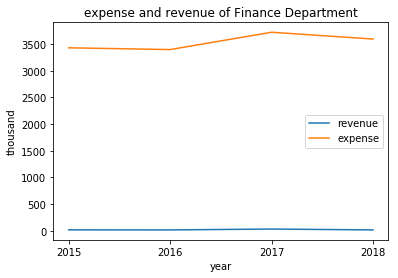

In [2]:
L_revenue = L1[L1["Account_type"] == "Revenue"]
L_expense = L1[L1["Account_type"] == "Expense"]
dic = {}
revenue = []
expense = []
revenue.append( L_revenue["year_2015"].sum()/1000)
revenue.append( L_revenue["year_2016"].sum()/1000)
revenue.append( L_revenue["year_2017"].sum()/1000)
revenue.append( L_revenue["year_2018"].sum()/1000)
expense.append(L_expense["year_2015"].sum()/1000)
expense.append(L_expense["year_2016"].sum()/1000)
expense.append(L_expense["year_2017"].sum()/1000)
expense.append(L_expense["year_2018"].sum()/1000)
dic["year"] = ["2015", "2016", "2017", "2018"]
dic["revenue"] = revenue
dic["expense"] = expense

df1 = pd.DataFrame(dic)
df1 = df1.set_index("year")

ax = df1.plot.line(title = "expense and revenue of Finance Department")
ax.set_xticks(range(len(df1.index)))
ax.set_xticklabels(df1.index)
ax.set_ylabel('thousand')
None
df1

Character_code,42 - INTERGOV REVENUES,47 - MISC REVENUE,48 - OTHER FINANCE SOURCE,49 - TRANSFER IN
year_2015,10.0230,152.4083,0.0212,0.00
year_2016,1.5728,150.0000,0.0000,0.00
year_2017,8.0807,150.0000,0.0000,157.45
year_2018,2.4239,150.0000,0.0000,0.00


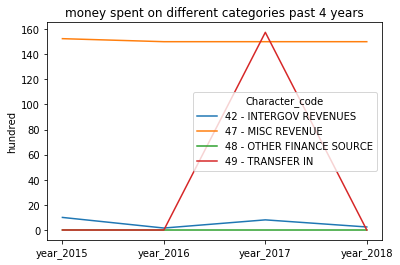

In [3]:
df2 = L_revenue.groupby(by = "Character_code").sum()
df2 = np.abs(df2)
df2["year_2015"] = df2["year_2015"] / 100
df2["year_2016"] = df2["year_2016"] / 100
df2["year_2017"] = df2["year_2017"] / 100
df2["year_2018"] = df2["year_2018"] / 100
df2 = df2.stack()
df2 = df2.unstack(0)
ax = df2.plot.line(title = "money spent on different categories past 4 years")
ax.set_xticks(range(len(df2.index)))
ax.set_xticklabels(df2.index)
ax.set_ylabel('hundred')
None 
df2

Character_code,51 - SALARIES,52 - BENEFITS,53 - SUPPLIES,54 - PURCHASED SERVICES,56 - DEBT OTHR FINANCING,57 - INTER DEPART CHARGES,58 - INTER DEPART BILLING
year_2015,2019.69860,803.15218,37.08137,558.98480,0.00000,12.200,0.0
year_2016,2123.30920,713.26844,41.74406,506.54476,0.00000,13.337,0.0
year_2017,2238.18476,809.54964,49.75388,609.99776,0.16756,15.450,0.0
year_2018,2229.59499,756.53211,37.13608,564.54412,0.00000,7.841,0.0


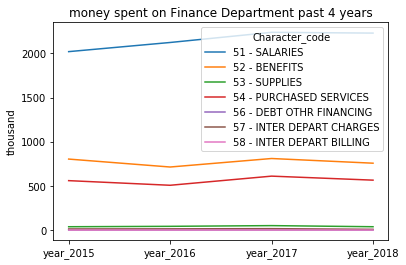

In [4]:
df3 = L_expense.groupby(by = "Character_code").sum()
df3 = np.abs(df3)
df3["year_2015"] = df3["year_2015"] / 1000
df3["year_2016"] = df3["year_2016"] / 1000
df3["year_2017"] = df3["year_2017"] / 1000
df3["year_2018"] = df3["year_2018"] / 1000
df3 = df3.stack()
df3 = df3.unstack(0)
ax = df3.plot.line(title = "money spent on Finance Department past 4 years")
ax.set_xticks(range(len(df3.index)))
ax.set_xticklabels(df3.index)
ax.set_ylabel('thousand')
None
df3

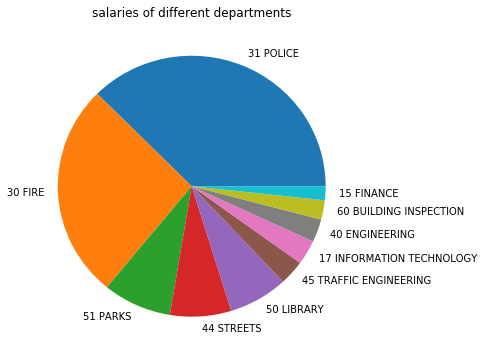

In [5]:
conn = sqlite3.connect('data.db')
L.to_sql("data_table", conn, if_exists="replace", index=False)
df4 = pd.read_sql("select Agency, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES' group by Agency order by total DESC", conn)
df5 = df4.set_index("Agency")
df5["total"].head(10).plot.pie(figsize=(6,6), label="", title = "salaries of different departments")
None

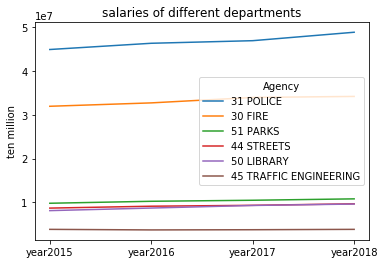

In [6]:
df6 = df4.set_index("Agency")
df6 = df6.drop(columns = ["total"])
df6 = df6.head(6)
df6 = df6.stack()
df6 = df6.unstack(0)
ax = df6.plot.line(title = "salaries of different departments")
ax.set_xticks(range(len(df6.index)))
ax.set_xticklabels(df6.index)
ax.set_ylabel('ten million')

None

In [7]:
df8 = pd.read_sql("select Agency, Organization, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES'  group by Organization order by total DESC", conn)


In [8]:
data = pd.read_excel('data_finance.xlsx', sheet_name='Sheet1')
df7 = DataFrame(data)
df7 = df7.set_index("category")


,adopted,projected,executive,requested,actual
2012,2812.037,2812.037,2866.704,2798.161,2688.356
2013,3176.262,3139.169,3106.013,2748.740,3009.703
2014,3175.984,3192.298,3159.075,3159.075,3226.293
2015,3311.157,3224.717,3283.950,3175.967,3414.876
2016,3589.531,3469.702,3475.002,3475.002,3382.002
2017,3691.808,3634.399,3726.341,3529.942,3691.551
2018,3783.041,3696.882,3798.041,3755.210,NaN


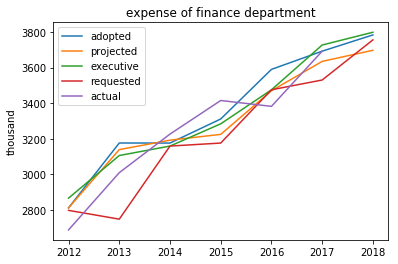

In [9]:
data3 = pd.read_excel('data_finance.xlsx', sheet_name='Sheet3')
df10 = DataFrame(data3)
df10["adopted"] = df10["adopted"] / 1000
df10["projected"] = df10["projected"] / 1000
df10["executive"] = df10["executive"] / 1000
df10["requested"] = df10["requested"] / 1000
df10["actual"] = df10["actual"] / 1000
ax = df10.plot.line(title = "expense of finance department")
ax.set_ylabel('thousand')
None
ax
df10

,adopted,projected,executive,requested,actual
2012,1676.775,1675.345,1709.911,1709.911,1557.141
2013,1951.297,1915.304,1912.985,1612.985,1814.079
2014,1966.407,1977.093,1955.537,1955.537,2025.937
2015,2073.489,2097.909,2058.266,1958.962,2186.033
2016,2276.449,2187.143,2303.483,2234.677,2122.529
2017,2351.670,2265.812,2338.332,2296.089,2304.963
2018,2289.939,2277.780,2289.939,2289.241,NaN


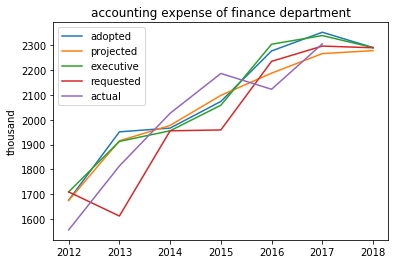

In [10]:
data2 = pd.read_excel('data_finance.xlsx', sheet_name='Sheet2')
df9 = DataFrame(data2)
df9["adopted"] = df9["adopted"] / 1000
df9["projected"] = df9["projected"] / 1000
df9["executive"] = df9["executive"] / 1000
df9["requested"] = df9["requested"] / 1000
df9["actual"] = df9["actual"] / 1000
ax = df9.plot.line(title = "accounting expense of finance department")
ax.set_ylabel('thousand')
None
ax
df9

In [16]:
data2
# take a dictionary describing current employees,
# randomly take actions for a year, then return
# new list of employees
def simulate_one_year(prior_employees):
    employees = copy.deepcopy(prior_employees)
    
    # simulate promotions
    # TODO: different positions will have different promotion patters
    for employee in employees.values():
        if random.random() < PROMOTION_PROB_PER_EMP:
            employee["salary"] *= PROMOTION_AMOUNT
            
    # simulate retiring
    emp_ids = list(employees.keys())
    for eid in emp_ids:
        if random.random() < RETIRE_PROB_PER_EMP:
            employees.pop(eid)
            
    # simulate hiring
    if random.random() < HIRE_PROB:
        employees[gen_emp_id()] = {"salary": START_SALARY, "position": "engineer"}
        
    return employees

,adopted,projected,executive,requested,actual
2012,1676.775,1675.345,1709.911,1709.911,1557.141
2013,1951.297,1915.304,1912.985,1612.985,1814.079
2014,1966.407,1977.093,1955.537,1955.537,2025.937
2015,2073.489,2097.909,2058.266,1958.962,2186.033
2016,2276.449,2187.143,2303.483,2234.677,2122.529
2017,2351.670,2265.812,2338.332,2296.089,2304.963
2018,2289.939,2277.780,2289.939,2289.241,NaN


In [12]:
#tabula may be helpful if you can directly read a table from the pdf

import tabula

df = tabula.read_pdf("/Users/zhongshilei/Desktop/data project/testpdf.pdf", encoding='gbk', pages='all')
print(df)


            Permanent Salaries    $  2 ,501,919  $.1  2 ,524,757  $.2  \
0          Hourly Employee Pay  NaN       5,222  NaN      10,602  NaN   
1                 Overtime Pay  NaN         562  NaN       3,033  NaN   
2              Fringe Benefits  NaN     783,608  NaN     885,318  NaN   
3           Purchased Services  NaN     408,310  NaN     476,953  NaN   
4                     Supplies  NaN      36,994  NaN      44,400  NaN   
5   Inter-Departmental Charges  NaN      11,944  NaN      11,959  NaN   
6    Debt/Other Financing Uses  NaN           0  NaN           0  NaN   
7               Capital Assets  NaN           0  NaN           0  NaN   
8           Total Expenditures    $  3 ,748,559    $  3 ,957,022    $   
9        Inter-Agency Billings  NaN     738,856  NaN     781,038  NaN   
10                  Net Budget    $  3 ,009,703    $  3 ,175,984    $   

    2 ,513,489  $.3  2 ,501,154  $.4  2 ,566,716  $.5  2 ,607,116  
0        8,358  NaN      13,086  NaN      13,086  NaN  

In [13]:
#pdfminer can display the content of the pdf, but it's hard to read data from that

from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice

from urllib.request import urlopen

fp = urlopen("https://www.cityofmadison.com/finance/documents/2015OpBud/Adopted/034-oper33.pdf")

#Create an interpreter associated with the document
parser = PDFParser(fp)

#PDF document object
doc = PDFDocument()

#Connect interpreter and document objects
parser.set_document(doc)
doc.set_parser(parser)

#Initialize the document(without password)
doc.initialize("")

#Create a PDF Explorer
resource = PDFResourceManager()

#Parameter analyzer
laparam = LAParams()

#Create an aggregator
device = PDFPageAggregator(resource, laparams=laparam)

#Create a PDF page interpreter
interpreter = PDFPageInterpreter(resource, device)

#Use the document object to get the collection of pages
for page in doc.get_pages():
    
    #Read using page interpreter
    interpreter.process_page(page)

    #Use an aggregator to get content
    layout = device.get_result()

    for out in layout:
    
        if hasattr(out, "get_text"):
            
            print(out.get_text())

Agency Number:
Budget Function:

33
General Government

Finance

The m ission of the City Finance Department is to enhance the financial health of the City and provide 
stewardship of City resources through financial information, advice and support to the public, employees, City 
agencies and policymakers. 

Major Service

Accounting
Budget and Audit
Risk Management
Administrative Support

    Agency Total

2013
Actual

2014
Adopted

2014
Projected

2015
Request

2015
Executive

2015
Adopted

$       
1,814,079
709,638
31,622
454,364
$       
3,009,703

$       
1,966,407
751,236
(1,515)
459,856
$       
3,175,984

$       
1,977,093
758,003
(1,864)
459,066
$       
3,192,298

$       
1,958,962
756,115
(5,967)
466,857
$       
3,175,967

$       
2,058,266
760,300
(4,281)
469,665
$       
3,283,950

$       
2,073,489
766,169
(1,983)
473,482
$       
3,311,157

Adopted Budget Highlights

The Budget includes: 

1. Funding for the continuation of existing services, including implementat

4
['Finance', 'Agency Number:', '33Budget Function:', 'General Government', '201320142014201520152015Major Service', 'Actual', 'Adopted', 'Projected', 'Request', 'Executive', 'Adopted', 'Accounting', '1814079', '       1966407', '       1977093', '       1958962', '       2058266', '       2073489', '      ', ' Budget and Audit', '709638', '          ', ' 751236', '          ', ' 758003', '          ', ' 756115', '          ', ' 760300', '          ', ' 766169', '          ', ' Risk Management', '31622', '            ', ' (1515', '             ', ' (1864', '             ', ' (5967', '             ', ' (4281', '             ', ' (1983', '             ', ' Administrative Support', '454364', '          ', ' 459856', '          ', ' 459066', '          ', ' 466857', '          ', ' 469665', '          ', ' 473482', '          ', '     Agency Total', '3009703', '       3175984', '       3192298', '       3175967', '       3283950', '       3311157', '       Adopted Budget Highlights', 'The'

,2013_actual,2014_adopted,2014_projected,2015_request,2015_executive,2015_adopted
accounting,18140.79,19664.07,19770.93,19589.62,20582.66,20734.89
budget and audit,7096.38,7512.36,7580.03,7561.15,7603.00,7661.69
risk management,316.22,-15.15,-18.64,-59.67,-42.81,-19.83
administrative support,4543.64,4598.56,4590.66,4668.57,4696.65,4734.82
total,30097.03,31759.84,31922.98,31759.67,32839.50,33111.57


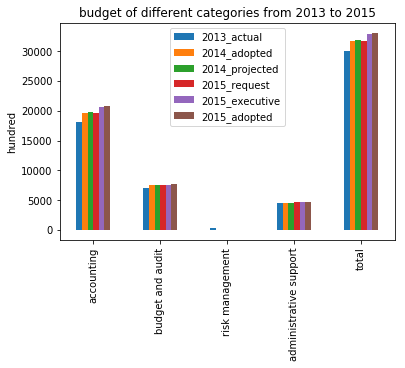

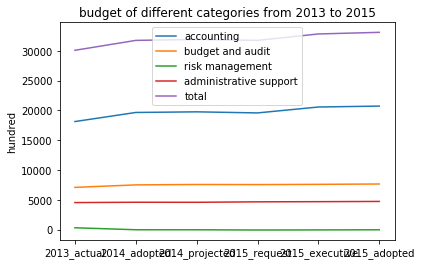

In [14]:
#PyPDF is useful for reading data from the pdf

# importing required modules 
import PyPDF2 
  
# creating a pdf file object 
pdfFileObj = open('testpdf.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
# printing number of pages in pdf file 
print(pdfReader.numPages) 
  
# creating a page object 
pageObj = pdfReader.getPage(0) 
  
# extracting text from page 
str = ''
str = pageObj.extractText()
str = str.replace("$", "")
str = str.replace(",", "").strip()
str = str.replace(")", "")
L = str.split("\n")
L.remove(' (ERP')
L1 = []
for letter in L:
    if letter.startswith(" ("):
        L1.append(0 - int(letter.replace(" (","")))

    if letter.strip().isdigit():
        L1.append(int(letter.strip()))

d = dict()
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
for i in range(len(L1)):
    if i % 6 == 0:
        l1.append(L1[i])
    if i % 6 == 1:
        l2.append(L1[i])
    if i % 6 == 2:
        l3.append(L1[i])
    if i % 6 == 3:
        l4.append(L1[i])
    if i % 6 == 4:
        l5.append(L1[i])
    if i % 6 == 5:
        l6.append(L1[i])
        
d["2013_actual"] = l1
d["2014_adopted"] = l2
d["2014_projected"] = l3
d["2015_request"] = l4
d["2015_executive"] = l5
d["2015_adopted"] = l6

df10 = DataFrame(d, index = ["accounting", "budget and audit", "risk management", "administrative support", "total"])


# closing the pdf file object 
pdfFileObj.close()

df10["2013_actual"] = df10["2013_actual"] / 100
df10["2014_adopted"] = df10["2014_adopted"] / 100
df10["2014_projected"] = df10["2014_projected"] / 100
df10["2015_request"] = df10["2015_request"] / 100
df10["2015_executive"] = df10["2015_executive"] / 100
df10["2015_adopted"] = df10["2015_adopted"] / 100

df11 = df10.stack()
df11 = df11.unstack(0)

ax1 = df10.plot.bar(title = "budget of different categories from 2013 to 2015")
ax1.set_ylabel('hundred')


ax = df11.plot.line(title = "budget of different categories from 2013 to 2015")
ax.set_xticks(range(len(df11.index)))
ax.set_xticklabels(df11.index)
ax.set_ylabel('hundred')

print(L)
df10

In [15]:
d1 = dict()
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
for i in range(len(L1)):
    if i % 6 == 0:
        l1.append(L1[i])
    if i % 6 == 1:
        l2.append(L1[i])
    if i % 6 == 2:
        l3.append(L1[i])
    if i % 6 == 3:
        l4.append(L1[i])
    if i % 6 == 4:
        l5.append(L1[i])
    if i % 6 == 5:
        l6.append(L1[i])
        
d["2013_actual"] = l1
d["2014_adopted"] = l2
d["2014_projected"] = l3
d["2015_request"] = l4
d["2015_executive"] = l5
d["2015_adopted"] = l6

{'2013_actual': [1814079, 709638, 31622, 454364, 3009703],
 '2014_adopted': [1966407, 751236, -1515, 459856, 3175984],
 '2014_projected': [1977093, 758003, -1864, 459066, 3192298],
 '2015_request': [1958962, 756115, -5967, 466857, 3175967],
 '2015_executive': [2058266, 760300, -4281, 469665, 3283950],
 '2015_adopted': [2073489, 766169, -1983, 473482, 3311157]}